# 복습 키워드

10강 (사용자 정의 함수) 요약:
- `def` 키워드로 함수 정의, `return`으로 값 반환
- 매개변수(parameter)와 인자(argument)의 차이
- 위치 인자와 키워드 인자 사용법
- 매개변수 기본값 설정 (기본값은 뒤쪽에 위치)
- 타입 힌트로 코드 가독성 향상 (예: `def func(x: int) -> str:`)
- 가변 매개변수: `*args` (튜플), `**kwargs` (딕셔너리)


# Python Basic Lecture 11: 함수 설계와 구현 (Function Design and Implementation)

이번 단원에서는 여러 개의 함수를 설계하고 조합하여 실제 프로그램을 만드는 방법을 배운다.

단순히 함수를 만드는 것을 넘어서, **함수를 어떻게 설계하고 조합하여 복잡한 기능을 구현할 것인가**를 연습한다.

## 학습 목표
1. 큰 문제를 작은 함수들로 분해하는 방법 이해
2. 함수 간의 데이터 흐름 설계
3. 여러 함수를 조합하여 복잡한 기능 구현
4. 코드 재사용성과 유지보수성 향상

## 함수 설계의 기본 원칙

### 1. 단일 책임 원칙 (Single Responsibility)
- 하나의 함수는 하나의 기능만 수행해야 한다
- 함수 이름이 함수의 기능을 명확히 설명해야 한다

### 2. 입력과 출력이 명확해야 한다
- 무엇을 받아서(input) 무엇을 반환하는지(output) 명확해야 한다
- 타입 힌트를 활용하면 더욱 명확해진다

### 3. 함수는 작고 단순하게
- 한 화면에 보일 정도로 짧게 작성
- 복잡한 로직은 여러 함수로 분리

지금까지의 에이전트 코딩에서조차 이런 원칙은 중요함.

## 실습 1: 학생 성적 관리 시스템

학생들의 성적을 입력받아 평균, 학점, 통계를 계산하는 시스템을 만들어보자.

### 필요한 기능 분석:
1. 점수 유효성 검사
2. 평균 계산
3. 학점 변환
4. 전체 통계 생성

In [1]:
# input?
# 데이터 구조 : 여러 학생, 여러 과목
# 데이터 형식은? 표 (Dataframe)
# oupput?
# 누구: 전체평균(개인 평균의 평균), 자기 점수, 과목별 등수?

# 기능?
# 개인 평균 -> 전체 평균
# 과목별 등수 재기

# 이름 정하기
# calculate_an_average(individual_scores) -> float
# calculate_total_average(all_scores: list[float]) -> float
# calculate_rank(scores: list[float]) -> list[int]
# report(name: str, scores)

data = {
    "이름": "철수 영희 길동".split(),
    "국어": [85, 90, 78],
    "영어": [88, 92, 80],
    "수학": [90, 85, 95],
    "과학": [82, 88, 91]
}

import pandas as pd
df = pd.DataFrame(data)

df

,이름,국어,영어,수학,과학
0,철수,85,88,90,82
1,영희,90,92,85,88
2,길동,78,80,95,91


# 함수의 정의역과 공역



In [39]:
def calculate_average(numlist: list[float]) -> float:
    return sum(numlist) / len(numlist)

def calculate_rank(scores: list[float]) -> list[int]:
    ordered = sorted(scores, reverse=True)
    ranks = []
    for score in scores:
        rank = ordered.index(score) + 1
        ranks.append(rank)

    return ranks

def calculate_subjectal_rank(scores_df: pd.DataFrame) -> dict:
    # 과목 출력
    names = scores_df['이름']
    subjects = scores_df.drop(columns='이름').columns
    result = {}

    for nm, sub in zip(names, subjects):
        # 각 과목의 전체 점수
        result[nm] = calculate_rank(scores_df[sub])

    return result


In [42]:
def report(scores_df: pd.DataFrame):
    # 학생별 개인 평균 계산
    names = []
    ind_avrg = []
    for i, row in scores_df.iterrows():
        names.append(row['이름'])
        ind_avrg.append(calculate_average(row[1:]))

    total_avrg = calculate_average(ind_avrg)
    ranks = calculate_subjectal_rank(scores_df)

    print("전체 평균:", total_avrg)
    print("개인 정보:")
    for name, avrg in zip(names, ind_avrg):
        print(f"{name}의 평균: {avrg:.2f}, 등수: {ranks[name]}")

report(df)

전체 평균: 87.0
개인 정보:
철수의 평균: 86.25, 등수: [2, 1, 3]
영희의 평균: 88.75, 등수: [2, 1, 3]
길동의 평균: 86.00, 등수: [2, 3, 1]


In [ ]:
# Step 1: 점수 유효성 검사 함수
def validate_score(score: float) -> bool:
    """점수가 0-100 사이인지 검사"""
    return 0 <= score <= 100

# 테스트
print(validate_score(85))   # True
print(validate_score(105))  # False
print(validate_score(-5))   # False

In [ ]:
# Step 2: 평균 계산 함수
def calculate_average(scores: list) -> float:
    """점수 리스트의 평균 계산"""
    if not scores:  # 빈 리스트 체크
        return 0.0
    return sum(scores) / len(scores)

# 테스트
test_scores = [85, 90, 78, 92, 88]
print(f"평균: {calculate_average(test_scores):.2f}")

### 💡 실습 1 핵심 포인트
- 각 함수가 하나의 명확한 역할을 수행
- `process_student_scores` 함수가 다른 함수들을 조합하여 복잡한 기능 구현
- 함수를 작게 나누면 테스트와 디버깅이 쉬워짐

## 📚 Colab에서 함수를 파일로 저장하고 쉽게 임포트하기

Google Colab에서는 런타임이 종료되면 파일이 사라집니다. Google Drive를 활용하면 함수를 영구 저장하고 쉽게 재사용할 수 있습니다.

### 초기 설정 (세션당 1회만, 가장 첫 번째 셀에서)
```python
# Google Drive 마운트
from google.colab import drive
drive.mount('/content/drive')

# Python 경로에 함수 폴더 추가 (세션당 1회만!)
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/functions/')
```

### %%writefile로 저장
```python
# 함수를 .py 파일로 저장
%%writefile '/content/drive/MyDrive/Colab Notebooks/functions/grade_system.py'
def validate_score(score: float) -> bool:
    """점수가 0-100 사이인지 검사"""
    return 0 <= score <= 100

def calculate_average(scores: list) -> float:
    """점수 리스트의 평균 계산"""
    if not scores:
        return 0.0
    return sum(scores) / len(scores)

def score_to_grade(score: float) -> str:
    """점수를 학점으로 변환"""
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'
```

### 함수 임포트하여 사용
```python
# 방법 1: 모듈 전체 임포트
import grade_system
result = grade_system.calculate_average([85, 90, 78])

# 방법 2: 특정 함수만 임포트
from grade_system import calculate_average, score_to_grade
avg = calculate_average([85, 90, 78])
grade = score_to_grade(avg)

# 방법 3: 별칭 사용
import grade_system as gs
result = gs.calculate_average([85, 90, 78])
```

### 💡 추천 폴더 구조
```
/content/drive/MyDrive/Colab Notebooks/functions/
    ├── grade_system.py      # 성적 관련 함수들
    ├── shopping_cart.py     # 쇼핑몰 관련 함수들
    ├── text_analysis.py     # 텍스트 분석 함수들
    └── utils.py            # 공통 유틸리티 함수들
```

### 🔄 코드 수정 후 다시 로드 (그냥 적용되지 않음)
```python
# 함수 수정 후 모듈 다시 불러오기
import importlib
importlib.reload(grade_system)
```

### ✅ 장점
- **영구 저장**: 런타임 종료 후에도 Drive에 보존
- **쉬운 관리**: 폴더별로 함수 정리 가능
- **빠른 임포트**: sys.path 추가 후 바로 import 가능
- **자동 저장**: 내장 에디터 사용 시 자동 저장
- **공유 가능**: Drive 링크로 다른 학생과 코드 공유

# 직접 만들어보자.


In [43]:
import seaborn as sns

penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 라벨 인코딩 해주는 함수

데이터프레임, 라벨인코딩 하고 싶은 열 이름들 -> 인코딩이 된 데이터프레임

In [60]:
def label_encoder(df, target_columns):
    df = df.copy()

    from sklearn.preprocessing import LabelEncoder
    encoders = {}

    for col in target_columns:
        le = LabelEncoder()
        transformed = le.fit_transform(df[col])
        df[col] = transformed
        encoders[col] = le

    return df.copy(), encoders


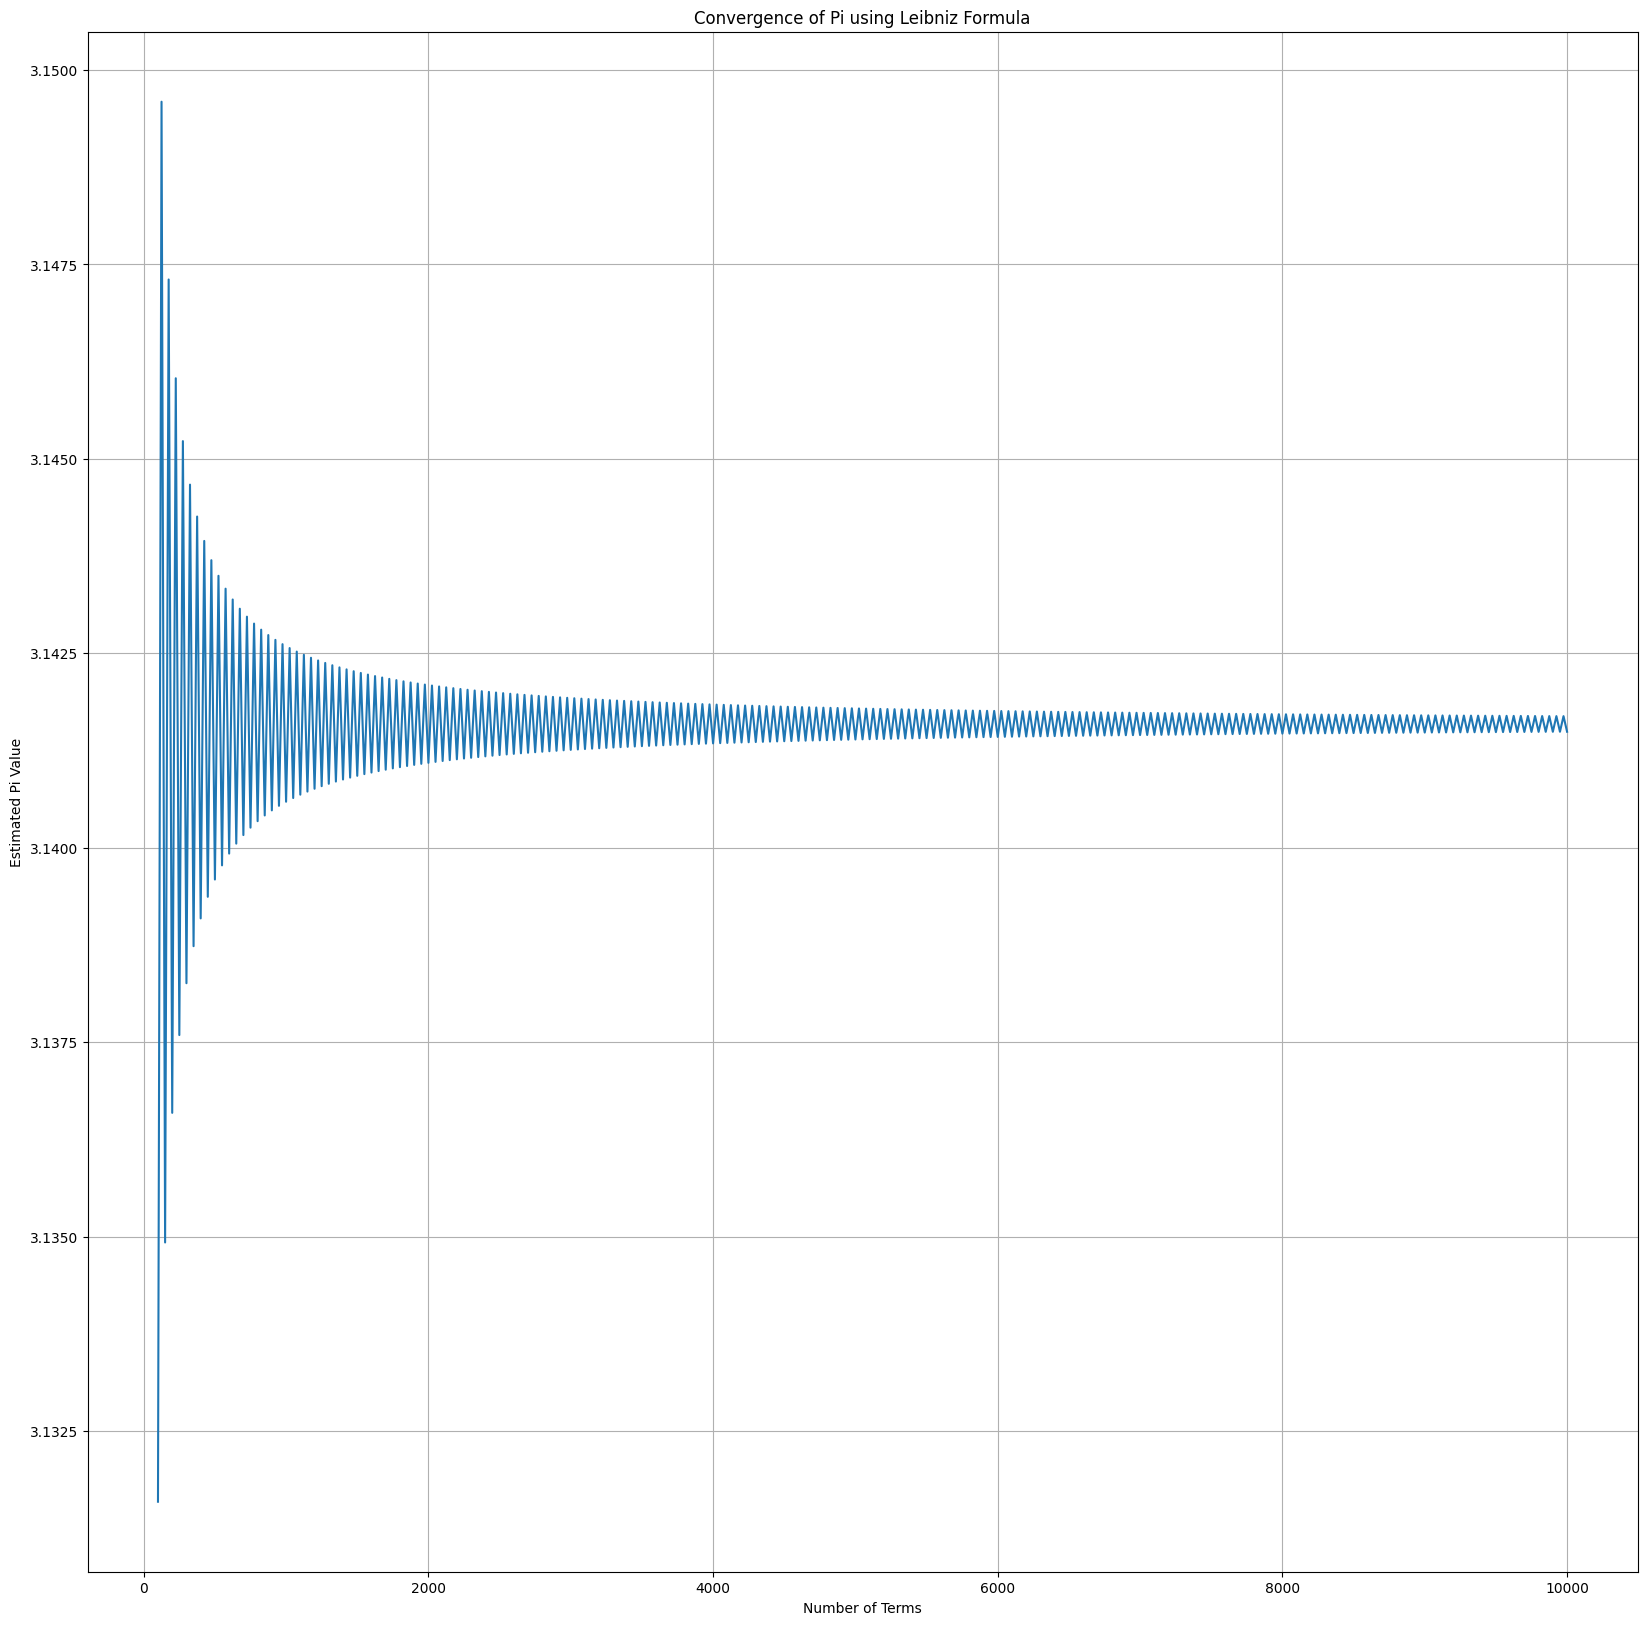

In [55]:
# 파이 계산 라이프니츠 공식?
# 4 * (1 - 1/3 + 1/5 - 1/7 + ...)

def generate_odd_fractions(n):
    """n개의 홀수 분수 생성"""
    return [1 / (2 * i + 1) for i in range(n)]

def generate_alternate_series(series: list):
    """홀수 분수의 부호를 번갈아가며 적용"""
    return [(-1) ** (i) * series[i] for i in range(len(series))]

def generate_lipnitz_series(n: int) -> list:
    return generate_alternate_series(
        generate_odd_fractions(n)
    )

def generate_lipnitz_pi(n: int) -> float:
    return 4 * sum(generate_lipnitz_series(n))


vals = []
for i in range (100, 10000+25, 25):
    pi = generate_lipnitz_pi(i)
    vals.append(pi)

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.plot(range(100, 10000+25, 25), vals)
plt.xlabel('Number of Terms')
plt.ylabel('Estimated Pi Value')
plt.title('Convergence of Pi using Leibniz Formula')
plt.grid()
plt.show()

In [64]:
# sklearn 로지스틱 회귀 import
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import Normalizer

import seaborn as sns

penguins = sns.load_dataset('penguins')
pen, encoders = label_encoder(penguins, ['species', 'island', 'sex'])

pen.dropna(inplace=True)

In [69]:
xs = pen.iloc[:, 1:]
ys = pen['species']

# 로지스틱 회귀 모델 생성
model = LogisticRegression(max_iter=100)
model.fit(xs, ys)

# 모델 평가
from sklearn.metrics import accuracy_score
predictions = model.predict(xs)
accuracy_score(ys, predictions)

C:\Users\catac\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9912280701754386